In [1]:
#correlation between SCI and population

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('data/combined.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df

,user_loc,fr_loc,scaled_sci,migrants_from_fr,gdp_user,gdp_fr,population_user,population_fr,literacyRate_user,literacyRate_fr,internetRate_user,internetRate_fr,hci_user,hci_fr,lat_user,lat_fr,long_user,long_fr,lang_user,lang_fr
0,AE,AE,1318515,NaN,43839.356350,43839.356350,9770529.0,9770529.0,NaN,NaN,94.819923,94.819923,0.676001,0.676001,24.46667,24.466670,54.41667,54.41667,Arabic,Arabic
1,AE,AG,7764,NaN,43839.356350,16726.980810,9770529.0,97118.0,NaN,NaN,94.819923,NaN,0.676001,0.578217,24.46667,17.133330,54.41667,-61.83333,Arabic,English
2,AE,AL,2836,NaN,43839.356350,5284.380184,9770529.0,2854191.0,NaN,98.141151,94.819923,71.847041,0.676001,0.628666,24.46667,41.333330,54.41667,19.81667,Arabic,Albanian
3,AE,AM,4174,NaN,43839.356350,4220.490277,9770529.0,2957731.0,NaN,NaN,94.819923,64.744884,0.676001,0.581726,24.46667,40.183330,54.41667,44.50000,Arabic,Armenian
4,AE,AO,2954,NaN,43839.356350,3289.646664,9770529.0,31825295.0,NaN,NaN,94.819923,14.339079,0.676001,0.360191,24.46667,-8.833333,54.41667,13.25000,Arabic,Portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34220,NA,YT,12385,NaN,5495.428836,NaN,2494530.0,NaN,91.527267,NaN,36.837406,NaN,0.445078,NaN,-22.56667,NaN,17.10000,NaN,English,NaN
34221,NA,ZA,88866,7872.0,5495.428836,6374.028196,2494530.0,58558270.0,91.527267,NaN,36.837406,56.167394,0.445078,0.422549,-22.56667,-25.730000,17.10000,28.22000,English,English
34222,NA,ZM,137582,2806.0,5495.428836,1556.334482,2494530.0,17861030.0,91.527267,86.747963,36.837406,27.852579,0.445078,0.391176,-22.56667,-15.466670,17.10000,28.26667,English,English
34223,NA,ZW,326749,13413.0,5495.428836,1683.740577,2494530.0,14645468.0,91.527267,NaN,36.837406,27.055488,0.445078,0.461242,-22.56667,-17.833330,17.10000,31.05000,English,English


In [2]:
# cleaning data to remove NA values
df = df[df['population_user'].notna()]
df = df[df['population_fr'].notna()]

In [3]:
# add a column for absolute difference of population
df["abs_diff_pop"] = abs(df['population_user'] - df['population_fr'])

# drop any rows if the absolute difference is 0; this is when a country was compared against itself
df.drop(df[df["abs_diff_pop"] == 0].index, inplace = True) 
print(df)

      user_loc fr_loc  scaled_sci  migrants_from_fr      gdp_user  \
1           AE     AG        7764               NaN  43839.356350   
2           AE     AL        2836               NaN  43839.356350   
3           AE     AM        4174               NaN  43839.356350   
4           AE     AO        2954               NaN  43839.356350   
5           AE     AR         887               NaN  43839.356350   
...        ...    ...         ...               ...           ...   
34217       NA     VU        1711               NaN   5495.428836   
34218       NA     WS        1411               NaN   5495.428836   
34221       NA     ZA       88866            7872.0   5495.428836   
34222       NA     ZM      137582            2806.0   5495.428836   
34223       NA     ZW      326749           13413.0   5495.428836   

             gdp_fr  population_user  population_fr  literacyRate_user  \
1      16726.980810        9770529.0        97118.0                NaN   
2       5284.380184    

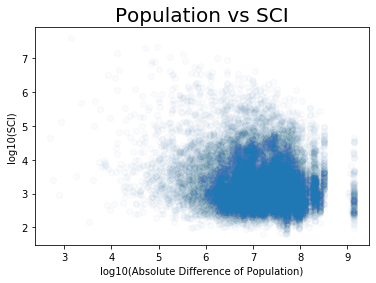

In [7]:
import math
df['scaled_sci'] = pd.to_numeric(df['scaled_sci'], errors='coerce')
df['SCI_log10'] = np.log10(df['scaled_sci'])
df['abs_diff_pop_log10'] = np.log10(df['abs_diff_pop'])

plt.scatter(df['abs_diff_pop_log10'], df['SCI_log10'], alpha = 0.01)
plt.xlabel('log10(Absolute Difference of Population)')
plt.ylabel('log10(SCI)')
plt.title('Population vs SCI', fontsize=20)
plt.show()

In [5]:
#using ranksums to perform Wilcoxon Rank Sum Test on two samples
from scipy.stats import ranksums
ranksums(df["scaled_sci"], df["abs_diff_pop"])

RanksumsResult(statistic=-214.9365949279262, pvalue=0.0)

In [6]:
#using spearmanr to get the spearman coeffecient of the two samples
from scipy.stats import spearmanr
sp_coef = spearmanr(df["scaled_sci"], df["abs_diff_pop"])
print(sp_coef)

SpearmanrResult(correlation=-0.12125544673386995, pvalue=2.3982916769165847e-102)
